In [79]:
#импортируем пакеты
import pandas as pd
import numpy as np
import seaborn as sns
from calendar import monthrange
import matplotlib.pyplot as plt

In [80]:
#считываем данные, задаем формат дат нужным колонкам
customers = pd.read_csv("C:/Users/HP/Downloads/olist_customers_dataset.csv")
items = pd.read_csv("C:/Users/HP/Downloads/olist_order_items_dataset.csv", parse_dates=["shipping_limit_date"])
orders = pd.read_csv("C:/Users/HP/Downloads/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp", 
                                                                                    "order_approved_at", 
                                                                                    "order_delivered_carrier_date",  
                                                                                    "order_delivered_customer_date", 
                                                                                    "order_estimated_delivery_date"])

In [81]:
customers.drop_duplicates(inplace=True)
items.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)

In [82]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [83]:
#Сколько у нас всего пользователей
customers.customer_unique_id.nunique()

96096

In [84]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [85]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [86]:
#Статусы заказов
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

## Задание 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [87]:
merged_customers = customers.merge(orders, on="customer_id")

In [88]:
#Подтвержден статус оплаты заказа
merged_customers = merged_customers[~merged_customers['order_approved_at'].isna()]

In [89]:
merged_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [90]:
#Сколько у нас пользователей, которые совершили покупку только один раз?
#Будем считать только по заказам которые были оплачены
total_orders_by_customer = merged_customers \
        .groupby("customer_unique_id", as_index=False) \
        .agg({"order_id" : "count"}) \
        .rename(columns = {"order_id" : "total_orders"})

In [91]:
#Вот и ответ, с долей к общему числу заказов.
print(total_orders_by_customer.query("total_orders == 1").shape[0]);
print(round(total_orders_by_customer.query("total_orders == 1").shape[0]/total_orders_by_customer.shape[0], 2))

93049
0.97


## Задание 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? Будем считать недоставленными заказами те заказы, статус которых canceled или unavailable, так же в качестве месяца будем брать месяц запланированной доставки(order estimated delivery)

In [92]:
orders["year"] = orders.order_estimated_delivery_date.dt.year
orders["month"] = orders.order_estimated_delivery_date.dt.month

In [93]:
orders["year_n_month"] = orders.order_estimated_delivery_date.dt.strftime("%Y-%m")

In [94]:
periods = orders.year_n_month.nunique()

In [95]:
not_delivered = orders.query("order_status == 'canceled' or order_status == 'unavailable'")

In [96]:
#В среднем, каждый месяц не доставлялось 45.7 заказов. 
mean_non_deliveries_by_month = not_delivered.groupby(["year_n_month"], as_index=False) \
                    .agg({"order_id" : "count"}).order_id.sum() / periods 
mean_non_deliveries_by_month

45.7037037037037

In [97]:
# Из за недоступности заказа не доставлялось каждый месяц в среднем 22.56 заказов.
not_delivered.query("order_status == 'unavailable'") \
            .groupby(["year", "month"], as_index=False) \
            .agg({"order_id" : "count"}).order_id.sum() / periods

22.555555555555557

In [98]:
# Из за недоступности заказа не доставлялось каждый месяц в среднем 23.15 заказов.
not_delivered.query("order_status == 'canceled'") \
            .groupby(["year", "month"], as_index=False) \
            .agg({"order_id" : "count"}).order_id.sum() / periods

23.14814814814815

## Задание 3.По каждому товару определить, в какой день недели товар чаще всего покупается. В качестве даты возьмем дату создания заказа, поскольку на мой взгляд крайне важно оценивать именно первичное взаимодействие с товаром.


In [99]:
# Дополним таблицу днем недели
orders["purchase_weekday"] =  orders.order_approved_at.dt.strftime("%A")

In [100]:
#Объединим 2 таблицы с необходимыми колонками
items_by_weekday = orders[["order_id", "purchase_weekday"]] \
                    .merge(items[["order_id", "product_id"]], on="order_id", how="right")

In [101]:
#Расчет количества покупок каждого товара по дням недели
items_by_weekday_count = items_by_weekday.groupby(["product_id", "purchase_weekday"], as_index=False) \
                                .agg({"order_id" : "count"}) \
                                .rename(columns={"order_id" : "items_count"}) 

In [102]:
#Дни, в которые чаще всего покупался конкретный товар
days = items_by_weekday_count.groupby("product_id", as_index=False).max().sort_values("items_count", ascending=False)
days

,product_id,purchase_weekday,items_count
22110,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,119
10865,53b36df67ebb7c41585e8d54d6772e08,Wednesday,105
8612,422879e10f46682990de24d770e7f83d,Wednesday,89
19740,99a4788cb24856965c36a24e339b6058,Wednesday,82
7078,368c6c730842d78016ad823897a372db,Wednesday,80
...,...,...,...
12728,62874f62bbdeec35f7cd827b1716c47e,Wednesday,1
12727,628677036f276f6c0792cded8e9211ee,Wednesday,1
12726,6281a79f478d260d81da138f7e03c0bb,Thursday,1
12725,627dce1ab24323cb7ac147cad5ac0b8c,Friday,1


<AxesSubplot:xlabel='weekday', ylabel='count'>

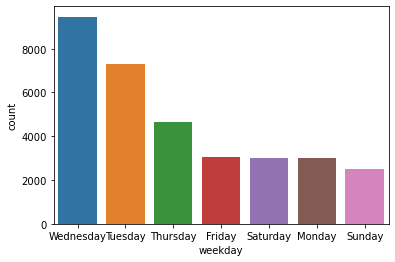

In [103]:
#Наиболее часто покупки совершались в среду, так же представлен график.
days1 = pd.DataFrame(days.purchase_weekday \
                     .value_counts() \
                     .reset_index()) \
                     .rename(columns={"index" : "weekday", "purchase_weekday" : "count"})
sns.barplot(x="weekday", y="count", data=days1)

## Задание 4 Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [104]:
# Делаем колонку с годом и месяцем
merged_customers["year_n_month"] = merged_customers.order_purchase_timestamp.dt.strftime("%Y-%m")

In [105]:
merged_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_n_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07


In [106]:
#Создаем новую таблицу с группировкой по пользователям и году и месяцу
orders_by_users_by_month = merged_customers.groupby(["customer_unique_id", "year_n_month"], as_index=False) \
                        .agg({"order_id" : "count"}) \
                        .rename(columns={"order_id": "orders_by_month"})

In [107]:
#Добавление в нову таблицу количества недель в месяце и высчитывание целевой метрики
orders_by_users_by_month["weeks_per_month"] = orders_by_users_by_month \
                    .year_n_month.apply(lambda x: monthrange(int(x.split("-")[0]), int(x.split("-")[1]))[1]/7)
orders_by_users_by_month["orders_by_week"] = orders_by_users_by_month.orders_by_month / orders_by_users_by_month.weeks_per_month

In [108]:
#Построение исскомой таблицы
orders_by_users_by_month.pivot(index="customer_unique_id", columns="year_n_month", values="orders_by_week")

year_n_month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffea47cd6d3cc0a88bd621562a9d061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.225806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffff371b4d645b6ecea244b27531430a,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 5 Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [109]:
#Выделяем первый заказ для каждого покупателя
first_orders = merged_customers.sort_values("order_approved_at").drop_duplicates("customer_unique_id")

In [110]:
first_orders = first_orders[["customer_unique_id", "order_id", "order_purchase_timestamp", "year_n_month"]]

In [111]:
first_orders["year_n_month"] = first_orders.order_purchase_timestamp.dt.strftime("%Y-%m")

In [112]:
merged_customers = merged_customers.merge(first_orders[["customer_unique_id", "year_n_month"]] \
                       .rename(columns={"year_n_month" : "cogort"}), on="customer_unique_id", how="left")

In [125]:
merged_customers["ret"] = (merged_customers.year_n_month.apply(lambda x: int(x[:4])) - merged_customers.cogort.apply(lambda x: int(x[:4])))*12 + (merged_customers.year_n_month.apply(lambda x: int(x[5:])) - merged_customers.cogort.apply(lambda x: int(x[5:])))

In [152]:
cogort_size = merged_customers.groupby("cogort", as_index=False) \
                            .agg({"customer_unique_id" : "count"}) \
                            .rename(columns={"customer_unique_id" : "cogort_size"})

In [163]:
ret = merged_customers.query("ret != 0") \
                .groupby(["ret", "cogort"], as_index=False) \
                .agg({"customer_unique_id" : "count"}) \
                .rename(columns={"customer_unique_id" : "customers"}) \
                .merge(cogort_size, on="cogort")

In [164]:
ret["retention"] = ret.customers / ret.cogort_size

In [169]:
month = ['2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12']

In [170]:
ret.pivot_table(index="cogort", columns="ret", values="retention").query("cogort in @month")

ret,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cogort,,,,,,,,,,,,,,,,,,,
2017-01,0.003601,0.002401,0.001200,0.003601,0.001200,0.004802,0.001200,0.001200,NaN,0.003601,0.001200,0.007203,0.003601,0.001200,0.001200,0.002401,0.003601,0.0012,NaN
2017-02,0.002200,0.002750,0.001100,0.003850,0.001100,0.002200,0.001650,0.001100,0.002200,0.001100,0.002750,0.001650,0.001650,0.001100,0.000550,0.000550,0.002750,NaN,NaN
2017-03,0.005029,0.003233,0.004310,0.003233,0.001437,0.001437,0.002874,0.003233,0.000718,0.003592,0.001437,0.002155,0.001078,0.001437,0.002155,0.000718,0.001437,NaN,NaN
2017-04,0.006080,0.002432,0.002027,0.003243,0.002432,0.003648,0.002837,0.002837,0.001621,0.002432,0.000811,0.000811,0.000405,0.000811,0.000811,0.002432,NaN,NaN,NaN
2017-05,0.004692,0.005474,0.003650,0.002868,0.003650,0.004432,0.001564,0.002346,0.003389,0.002346,0.003128,0.002607,0.000261,0.002086,0.002868,NaN,NaN,NaN,NaN
2017-06,0.004513,0.003610,0.003911,0.002407,0.003610,0.003610,0.002106,0.001203,0.002106,0.003008,0.003309,0.001504,0.001203,0.002106,NaN,NaN,NaN,NaN,NaN
2017-07,0.005362,0.003412,0.002437,0.003168,0.001950,0.002925,0.000975,0.001950,0.002681,0.002194,0.003168,0.001219,0.002437,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,0.006573,0.003626,0.002493,0.003400,0.005440,0.002720,0.002493,0.001360,0.001360,0.002267,0.001813,0.000907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,0.006438,0.005059,0.003679,0.004369,0.002989,0.002069,0.002299,0.002759,0.001610,0.002529,0.000690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 6. Провести RFM кластеризацию. Определим границы кластеров. Кластеры R и M будем считать по 33 и 66 перцентилю.  Кластер F. Поскольку большинство пользователей совершили только 1 покупку, то для него будут группы тех кто совершил всего одну покупку, те кто совершил 2-3 покупки и те кто совершил более 3х покупок. 

In [177]:
#будем искать время с последней покупки как разницу 
#между максимальным временем последней покупки в датафрейме и временем последней покупки каждого юзера
max_date = orders.order_purchase_timestamp.max()

In [174]:
#Ищем для каждого заказа последнее время его оформления
#Так же при дальнейшем анализе будем использовать только те заказы, по которым оплата произведена,
#и статус заказа не был отменен или не доступен
rfm = merged_customers \
        .query("order_status != 'canceled' and order_status != 'unavailable'") \
        .groupby("customer_unique_id", as_index=False) \
        .agg({"order_purchase_timestamp" : "max"})

In [179]:
rfm

,customer_unique_id,order_purchase_timestamp,last_time
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-10-17 17:30:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-10-17 17:30:18
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2018-10-17 17:30:18
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2018-10-17 17:30:18
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2018-10-17 17:30:18
...,...,...,...
94968,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2018-10-17 17:30:18
94969,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2018-10-17 17:30:18
94970,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2018-10-17 17:30:18
94971,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-10-17 17:30:18


In [178]:
rfm["last_time"] = max_date

In [180]:
#Время от последнего заказа
rfm["r"] = rfm.last_time - rfm.order_purchase_timestamp

In [181]:
#Перевод метрики в дни
rfm["r"] = rfm.r.apply(lambda x: x.days)

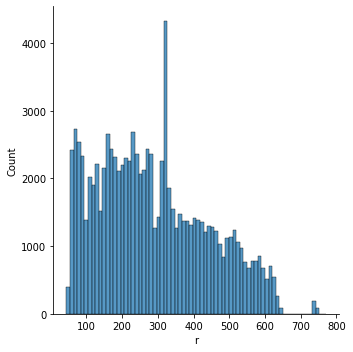

In [50]:
sns.displot(rfm.r)

In [185]:
#Определяем количество заказов для каждого юзера
f = merged_customers \
    .query("order_status != 'canceled' and order_status != 'unavailable'") \
    .groupby("customer_unique_id", as_index=False) \
    .agg({"order_id" : "count"}) \
    .rename(columns={"order_id" : "f"})

In [186]:
rfm = rfm.merge(f, on="customer_unique_id")

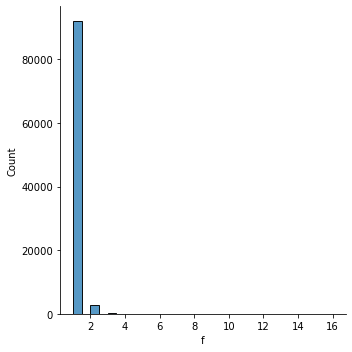

In [187]:
sns.displot(rfm.f, bins=30)

In [190]:
#Определяем сумму покупок для каждого юзера
m1= items[["order_id", "price"]].merge(merged_customers[["customer_unique_id", "order_approved_at", "order_id", "order_status"]], on="order_id")

In [192]:
m = m1.query("order_status != 'canceled' and order_status != 'unavailable'") \
    .groupby("customer_unique_id", as_index=False) \
    .agg({"price" : "sum"}) \
    .rename(columns={"price" : "m"})

In [193]:
m

,customer_unique_id,m
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
94966,fffea47cd6d3cc0a88bd621562a9d061,64.89
94967,ffff371b4d645b6ecea244b27531430a,89.90
94968,ffff5962728ec6157033ef9805bacc48,115.00


In [194]:
#для метрики M получилось на 3 наблюдения больше. Найдем каждого из пользователей,
#вошедших в прежний датафрейм, но не вошедших в метрику M, оказалось, что в таблице с товарами их заказов нет.
#Я решил не включать их в дальнейший анализ 
l1 = rfm.customer_unique_id.to_list()
l2 = m.customer_unique_id.to_list()

In [195]:
np.setdiff1d(l1,l2)

array(['6a2da481aa7827b951175772a0fe8bb8',
       '8886115442775dd8a20c2dcc921c7cc8',
       'f15a952dfc52308d0361288fbf42c7b3'], dtype='<U32')

In [196]:
customers[customers.customer_unique_id == '8886115442775dd8a20c2dcc921c7cc8']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
77110,0d00d77134cae4c58695086ad8d85100,8886115442775dd8a20c2dcc921c7cc8,88070,florianopolis,SC


In [197]:
orders[orders.customer_id == "0d00d77134cae4c58695086ad8d85100"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,year_n_month,purchase_weekday
69926,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaT,NaT,2016-11-29,2016,11,2016-11,Thursday


In [198]:
items[items.order_id == "e04f1da1f48bf2bbffcf57b9824f76e1"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [199]:
rfm = rfm.merge(m, on="customer_unique_id")

In [204]:
rfm

,customer_unique_id,order_purchase_timestamp,last_time,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-10-17 17:30:18,160,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-10-17 17:30:18,163,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2018-10-17 17:30:18,585,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2018-10-17 17:30:18,369,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2018-10-17 17:30:18,336,1,180.00
...,...,...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2018-10-17 17:30:18,495,1,1570.00
94966,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2018-10-17 17:30:18,310,1,64.89
94967,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2018-10-17 17:30:18,617,1,89.90
94968,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-10-17 17:30:18,168,1,115.00


In [200]:
rfm.m.describe()

count    94970.000000
mean       142.073605
std        216.085833
min          0.850000
25%         47.900000
50%         89.890000
75%        155.000000
max      13440.000000
Name: m, dtype: float64

In [221]:
#Считаем перцентили для метрик
quantiles = rfm[["r", "f", "m"]].quantile([0.33,0.66])
quantiles

,r,f,m
0.33,196.0,1.0,57.99
0.66,335.0,1.0,124.99


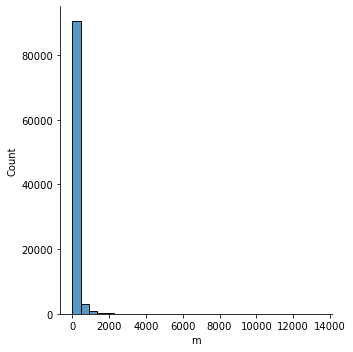

In [201]:
sns.displot(rfm.m, bins=30)

In [207]:
def RClass(value,parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.33]:
        return 1
    elif value <= quantiles_table[parameter_name][0.66]:
        return 2
    else:
        return 3


def MClass(value, parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.33]:
        return 3
    elif value <= quantiles_table[parameter_name][0.66]:
        return 2
    else:
        return 1

In [210]:
# Разбиение по кластерам. Чем меньше число в каждом кластере, тем ценнее для нас клиент
rfm["r_cluster"] = rfm.r.apply(RClass, args=("r", quantiles))

rfm["f_cluster"] = rfm.f.apply(lambda x: "3" if x == 1 else "2" if 1 < x <=3 else "1")
rfm["m_cluster"] = rfm.m.apply(MClass, args=("m", quantiles))

In [216]:
#Объединение всех кластеров
rfm["cluster"] = rfm["r_cluster"].map(str) + rfm["f_cluster"].map(str) + rfm["m_cluster"].map(str)


In [222]:
rfm.cluster.nunique()

23

In [217]:
#Количество человек в каждом кластере. 4 предполагаемых кластера оказались с 0 пользователей.
rfm.cluster.value_counts()

332    10649
333    10520
233    10496
331    10205
132    10189
133    10136
131    10044
231    10036
232     9809
121      706
221      696
321      555
122      246
322      222
222      218
323       75
123       62
223       58
111       28
211       13
311        4
312        2
313        1
Name: cluster, dtype: int64

In [218]:
rfm.cluster.nunique()

23

In [219]:
rfm

,customer_unique_id,order_purchase_timestamp,last_time,r,f,m,r_cluster,f_cluster,m_cluster,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-10-17 17:30:18,160,1,129.90,1,3,1,131
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-10-17 17:30:18,163,1,18.90,1,3,3,133
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2018-10-17 17:30:18,585,1,69.00,3,3,2,332
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2018-10-17 17:30:18,369,1,25.99,3,3,3,333
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2018-10-17 17:30:18,336,1,180.00,3,3,1,331
...,...,...,...,...,...,...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2018-10-17 17:30:18,495,1,1570.00,3,3,1,331
94966,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2018-10-17 17:30:18,310,1,64.89,2,3,2,232
94967,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2018-10-17 17:30:18,617,1,89.90,3,3,2,332
94968,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-10-17 17:30:18,168,1,115.00,1,3,2,132


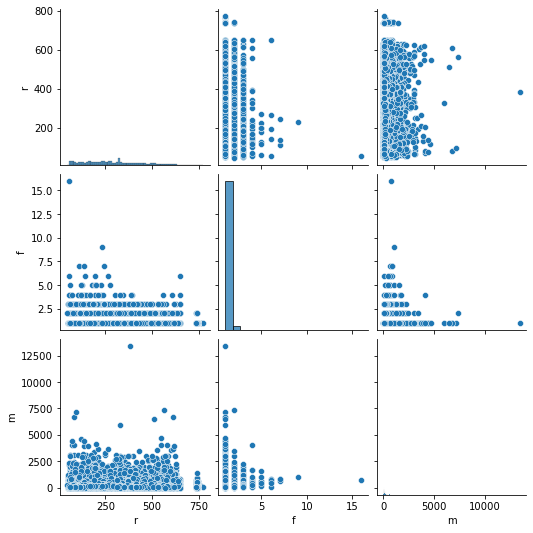

In [220]:
sns.pairplot(rfm[["r", "f", "m"]])